In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold, permutation_test_score
from sklearn import datasets

/Users/r3dmaohong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
n_classes = np.unique(y).size

In [19]:
X.shape

(150, 4)

In [20]:
# Some noisy data not correlated
random = np.random.RandomState(seed=0)
E = random.normal(size=(len(X), 2200))

# Add noisy data to the informative features for make the task harder
X = np.c_[X, E]

In [21]:
X.shape

(150, 2204)

In [25]:
svm = SVC(kernel='linear')
cv = StratifiedKFold(y, n_folds=2)

score, permutation_scores, pvalue = permutation_test_score(
    svm, X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)

print("Classification score %s (p-value : %s)" % (round(score, 3), round(pvalue, 5)))

Classification score 0.513 (p-value : 0.0099)


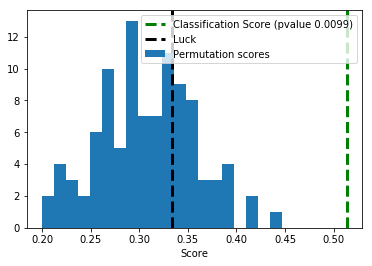

In [32]:
plt.hist(permutation_scores, bins=20, label='Permutation scores')
ylim = plt.ylim()

plt.plot(2 * [score], ylim, '--g', linewidth=3,
         label='Classification Score (pvalue %s)' % round(pvalue,5))
plt.plot(2 * [1. / n_classes], ylim, '--k', linewidth=3, label='Luck')

plt.ylim(ylim)
plt.legend()
plt.xlabel('Score')
plt.show()